# Customer Segmentation 

## Introduction to Customer Segmentation

Customer segmentation is a powerful technique in data science that enables businesses to categorize their customers into distinct groups based on shared characteristics. This approach is pivotal in understanding customer behavior, optimizing marketing strategies, and enhancing customer service. In this assignment, we will delve into the practical application of customer segmentation using machine learning algorithms.

- **Significance of Customer Segmentation**:
  - **Targeted Marketing**: Tailoring marketing campaigns to specific customer groups based on their purchasing behavior and preferences.
  - **Product Customization**: Developing products and services that cater to the specific needs and desires of different customer segments.
  - **Improved Customer Experience**: Delivering personalized experiences to customers, increasing satisfaction and loyalty.

The example code provided serves as a starting point for this exploration. It demonstrates the application of K-Means clustering, a popular technique in machine learning for grouping data. This algorithm partitions customers into clusters based on features like transaction amount, account balance, and transaction frequency.

- **Key Techniques and Concepts**:
  - **K-Means Clustering**: Understand and apply K-Means to segment customers.
  - **Data Standardization**: Learn the importance of scaling features for effective clustering.
  - **Cluster Visualization**: Gain skills in visualizing the clusters to extract meaningful insights.

Students are encouraged to expand upon this initial code by experimenting with different numbers of clusters, applying additional clustering techniques like Hierarchical Clustering and DBSCAN, and performing a thorough analysis of the clusters to understand their business implications. This assignment is not only a technical task but also a venture into strategic business analysis through the lens of data science.


```
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
data = pd.DataFrame({
    'TransactionAmount': np.random.uniform(10, 1000, 100),
    'AccountBalance': np.random.uniform(500, 5000, 100),
    'TransactionFrequency': np.random.poisson(5, 100)
})

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Choose the number of clusters (you may want to experiment with this)
num_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters (for two features)
plt.scatter(data['TransactionAmount'], data['AccountBalance'], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Balance')
plt.show()

# Display the cluster centers (in the standardized feature space)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=data.columns[:-1])
print(cluster_centers_df)
```

## Customer Segmentation Coding Assignment

### Main Assignment (100 points total)

#### 1. Data Exploration and Analysis (20 points)
- **Background**: Understanding the dataset's structure and key characteristics.
- **Tasks**:
  - Explore the distribution of features like 'Annual Income' and 'Spending Score'.
  - Identify any interesting patterns or insights from the data.
- **Points**: Detailed analysis and insights from data exploration.

#### 2. Enhanced Clustering with K-Means (20 points)
- **Background**: Application of K-Means clustering to the standardized data.
- **Tasks**:
  - Experiment with different numbers of clusters.
  - Justify the chosen number of clusters based on your analysis.
- **Points**: Creativity in experimenting with cluster numbers and justification.

**Example Code**
```python
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)
```

#### 3. Advanced Implementation of Hierarchical Clustering (20 points)
- **Background**: Applying and interpreting Hierarchical Clustering.
- **Tasks**:
  - Analyze the dendrogram to determine the optimal number of clusters.
  - Provide insights into how hierarchical clustering segments customers differently than K-Means.
- **Points**: Quality of analysis and interpretation of hierarchical clustering results.

**Example Code**
```python
Z = linkage(scaled_data, 'ward')
dendrogram(Z)
plt.show()
```

#### 4. Comprehensive Cluster Analysis (20 points)
- **Background**: Deeper evaluation of the clustering results.
- **Tasks**:
  - Compare the characteristics of the clusters from both clustering methods.
  - Calculate and interpret additional cluster quality metrics beyond silhouette score.
- **Points**: Depth of comparative analysis and use of additional metrics.

**Example Code**
```python
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
```

#### 5. Insightful Reporting and Visualization (20 points)
- **Background**: Effective communication of findings.
- **Tasks**:
  - Create insightful visualizations to represent the clustering results.
  - Write a comprehensive report discussing findings, methodologies, and potential business implications.
- **Points**: Clarity, creativity, and thoroughness in reporting and visualization.

**Example Code**
```python
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=kmeans.labels_)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
```

## Summarized Grading Rubric for Customer Segmentation Coding Assignment

### Main Assignment (100 points total)
- **1. Data Exploration and Analysis (20 points)**
- **2. Enhanced Clustering with K-Means (20 points)**
- **3. Advanced Implementation of Hierarchical Clustering (20 points)**
- **4. Comprehensive Cluster Analysis (20 points)**
- **5. Insightful Reporting and Visualization (20 points)**

### Summary Statement about the Assignment
In this assignment, we will engage in a practical application of customer segmentation, utilizing a range of machine learning techniques. We will conduct a thorough data exploration to uncover underlying patterns, apply and justify the use of K-Means clustering, explore the depth of hierarchical clustering, and provide a comprehensive analysis of the clustering results. Furthermore, we are expected to effectively communicate their findings through insightful visualizations and detailed reports, demonstrating their ability to translate technical analysis into actionable business insights. The assignment is designed not only to test technical proficiency but also to enhance our analytical thinking and their ability to draw meaningful conclusions from complex datasets.


# Assignment Solution

In [ ]:
# %pip install pandas numpy scikit-learn matplotlib seaborn

## Read Data

In [1]:
import pandas as pd


df = pd.read_csv("Mall_Customers.csv")
print(df.columns)
print(df.shape)
print(df.info())
df.head()

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
# renaming the fields to make it easier to access

df.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score']

## Exploratory Data Analysis

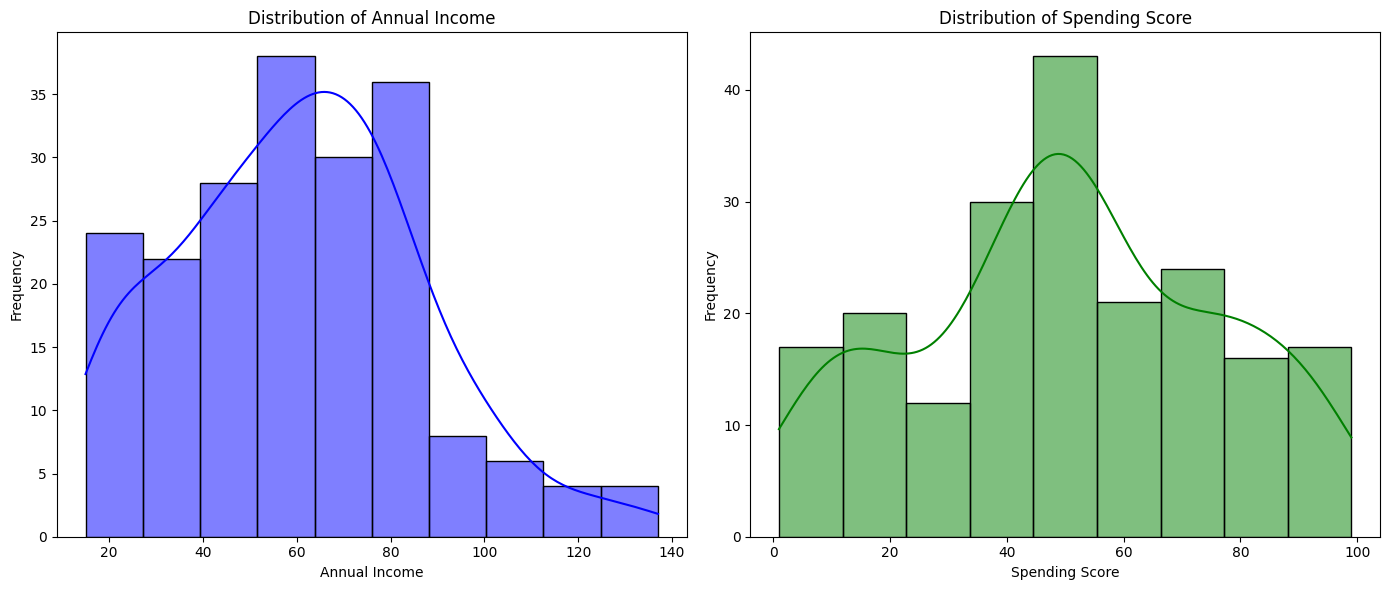

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Distribution of Annual Income
plt.subplot(1, 2, 1)
sns.histplot(df['Annual Income'], kde=True, color='blue')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

# Distribution of Spending Score
plt.subplot(1, 2, 2)
sns.histplot(df['Spending Score'], kde=True, color='green')
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


* Annual Income seems to be a little skewed
* Spending Score seems more balanced

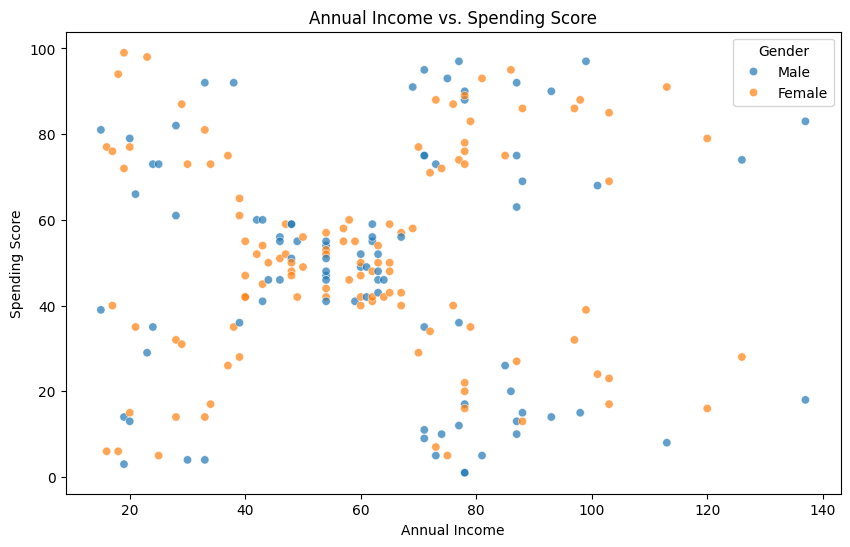

In [7]:
# Plotting Annual Income by Age and Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Spending Score', hue='Gender', data=df, alpha=0.7)
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Gender')
plt.show()

* Just based off, Annual Income and Spending Score there seems to be 5 distinct clusters, regardless of Gender.

                     Age  Annual Income  Spending Score
Age             1.000000      -0.012398       -0.327227
Annual Income  -0.012398       1.000000        0.009903
Spending Score -0.327227       0.009903        1.000000


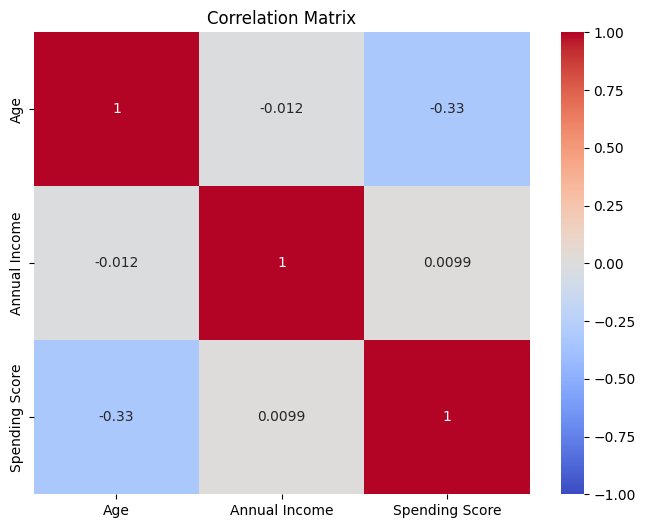

In [8]:

# Correlation matrix to see relationships between numerical variables
correlation_matrix = df[['Age', 'Annual Income', 'Spending Score']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


* Spending Score and Age has a negative correlation but not that high -- expected!
* Annual Income and Spending Score has a low correlation -- Surprising!
* Age and Annual Income has low correlation -- Intriguing!


#### Distribution of annual Income by age group and gender

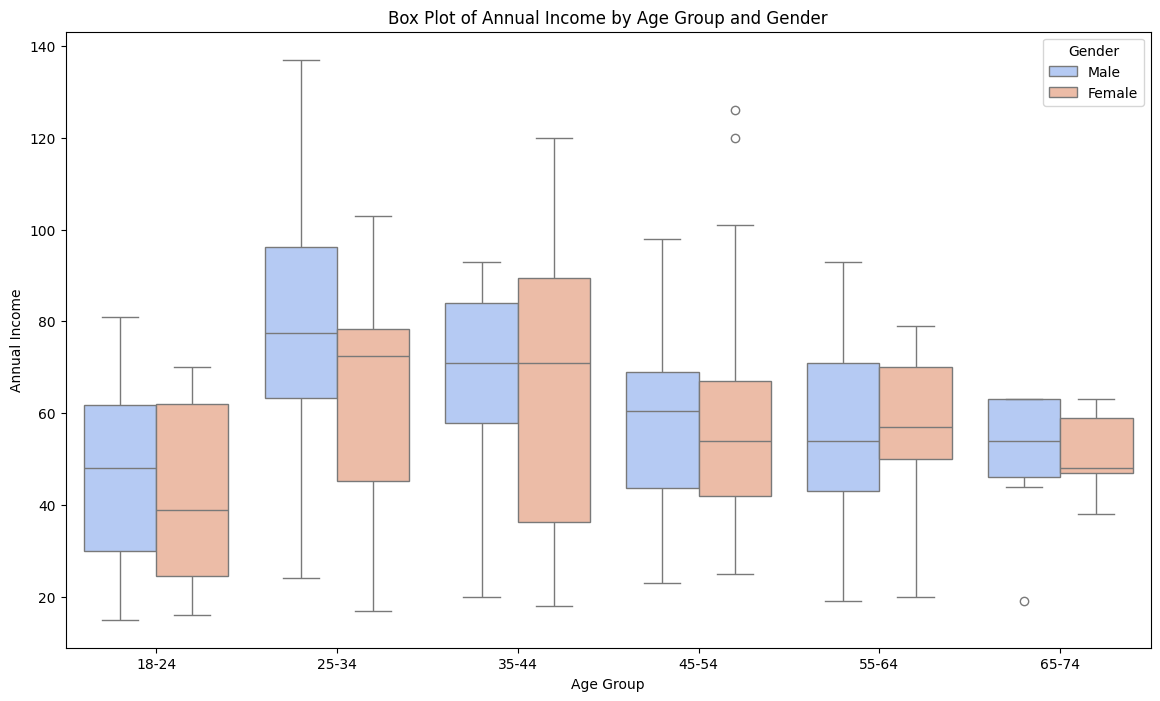

In [9]:
# Create age groups
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

del labels, bins


# Plotting the box plot of Annual Income by Age Group and Gender
plt.figure(figsize=(14, 8))
sns.boxplot(x='Age Group', y='Annual Income', hue='Gender', data=df, palette='coolwarm')
plt.title('Box Plot of Annual Income by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Annual Income')
plt.legend(title='Gender')
plt.show()


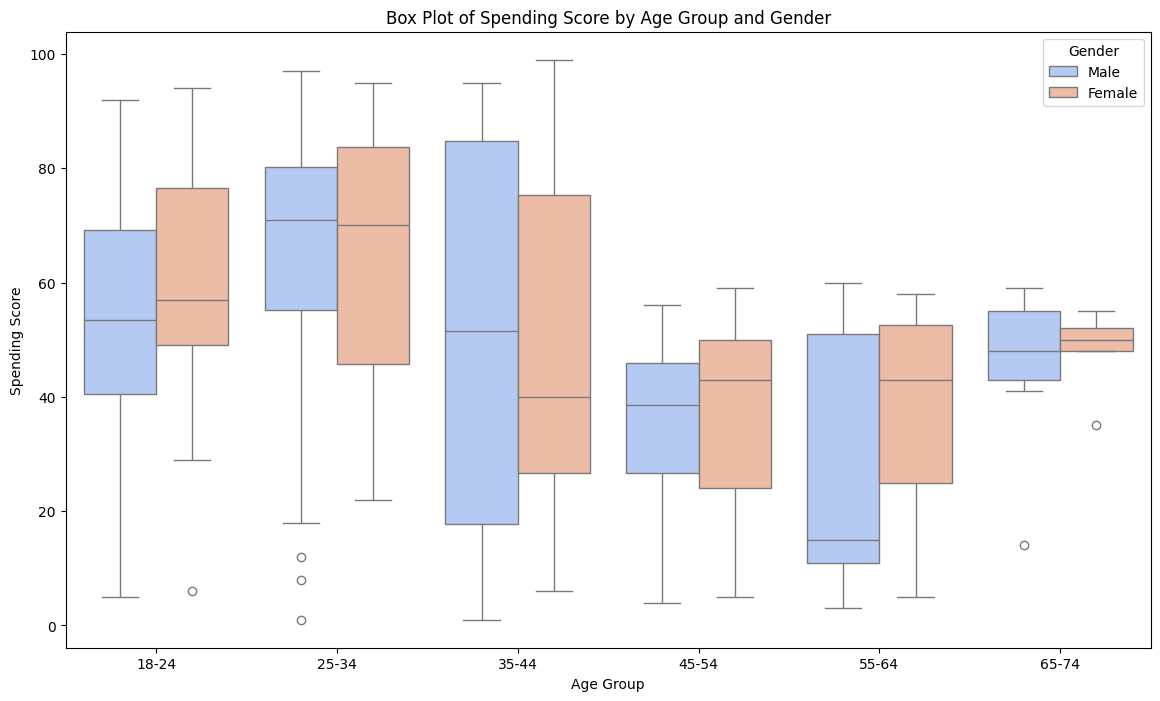

In [10]:
# Plotting the box plot of Annual Income by Age Group and Gender
plt.figure(figsize=(14, 8))
sns.boxplot(x='Age Group', y='Spending Score', hue='Gender', data=df, palette='coolwarm')
plt.title('Box Plot of Spending Score by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Spending Score')
plt.legend(title='Gender')
plt.show()


## Clustering The Customers

* Using Binary Categorical value like Gender is going to skew the data for clustering purposes, it doesn't work well with distance metrics used for clustering.

### Data Preparation for Plots

In [11]:
# Select features for clustering
features = df[['Age', 'Annual Income', 'Spending Score']]

In [12]:
from sklearn.preprocessing import StandardScaler

# Standardize the features -- makes it comparable across features for distance metrics
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### KMeans --- clusters should be 5

A silhouette score is a metric used to evaluate the quality of clusters created by clustering algorithms. It measures how well a data point fits into its assigned cluster and how distinct it is from other clusters. The score ranges from -1 to +1, with higher values indicating better matches

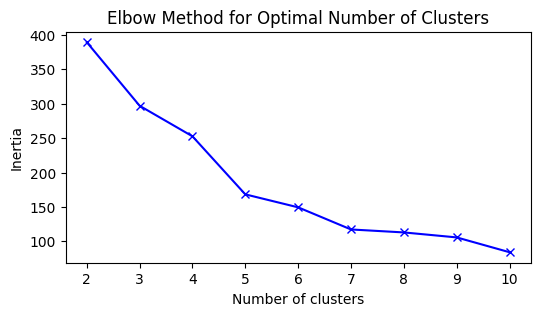

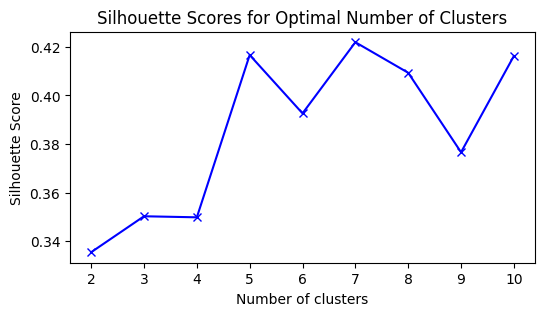

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Experiment with different numbers of clusters
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))
    del k, kmeans


# Plot the Elbow Method graph
plt.figure(figsize=(6, 3))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Plot the Silhouette scores
plt.figure(figsize=(6, 3))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal Number of Clusters')
plt.show()

del inertia, silhouette_scores, K

* Appropriate value seems to be 5 for number of clusters using Kmeans

In [15]:
# Apply K-Means with the chosen number of clusters
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(scaled_features)

kmeans_labels = kmeans.labels_

df['Cluster_KMeans'] = kmeans.labels_

# Calculate the Silhouette score for the chosen number of clusters
sil_score = silhouette_score(scaled_features, kmeans.labels_)
print(f'Silhouette Score for {optimal_k} clusters: {sil_score}')

del sil_score
del optimal_k, kmeans


Silhouette Score for 5 clusters: 0.41664341513732767


### Hierarchical Clustering

* This technique can be used to develop a tiered marketing strategy. 
* For example, they can identify sub-segments within larger groups to tailor more granular marketing campaigns, such as targeted emails or loyalty programs.


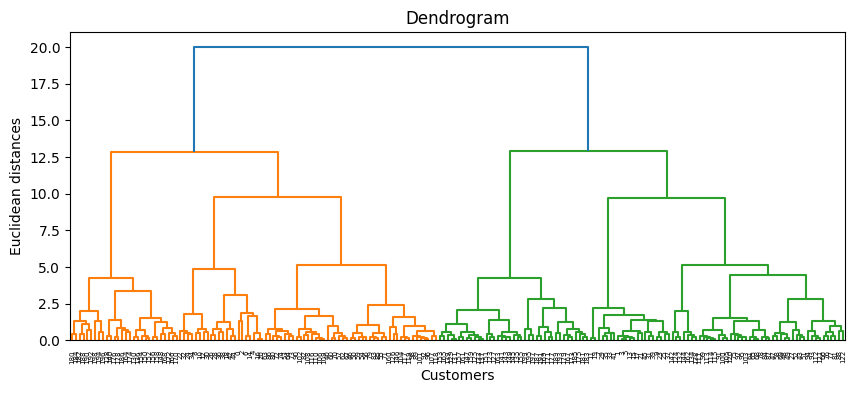

In [18]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Generate the dendrogram
plt.figure(figsize=(10, 4))

dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

del dendrogram

* 6 seems to be correct number of clusters in the data --horizontal line at 7.5
* Vertical distances between clusters they maximize at between 5.0 and 10.0 - giving a good place to distinguish between clusters.

In [19]:
from sklearn.cluster import AgglomerativeClustering

# Assuming the optimal number of clusters determined from the dendrogram is 2
optimal_clusters = 6

hc = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(scaled_features)

df['Cluster_HC'] = hc_labels

del optimal_clusters, hc

### DB Scan

* This technique can reveal niche segments and detect unusual customer behavior that might be overlooked by other clustering methods. 
* DBSCAN could be used identify high-value but rare customer segments. 
* This insight can allows for targeted high-touch marketing efforts, such as personalized outreach or exclusive offers.

#### Plot the k-Distance Graph:

In the k-Distance graph, look for an "elbow" point where the curve starts to bend. This point is a good candidate for the eps value, as it indicates a transition from dense regions to sparser regions.

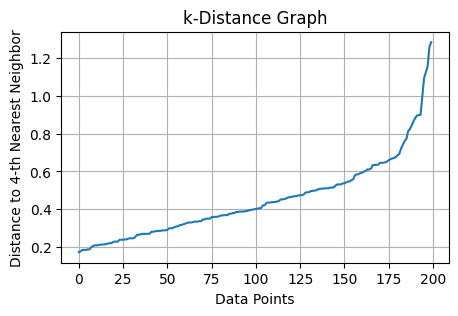

In [20]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np


# Number of neighbors for k-distance graph (typically equal to min_samples)
min_samples_value = 4  
# This should match the min_samples parameter for DBSCAN 
# Domain based decision



# Compute the distances to the k-th nearest neighbors
neighbors = NearestNeighbors(n_neighbors=min_samples_value)
neighbors_fit = neighbors.fit(scaled_features)
distances, indices = neighbors_fit.kneighbors(scaled_features)

# Sort distances to the k-th nearest neighbor
distances = np.sort(distances[:, min_samples_value-1], axis=0)

# Plot k-distance graph
plt.figure(figsize=(5, 3))
plt.plot(distances)
plt.title('k-Distance Graph')
plt.xlabel('Data Points')
plt.ylabel('Distance to {}-th Nearest Neighbor'.format(min_samples_value))
plt.grid()
plt.show()


del neighbors, neighbors_fit, distances, indices

In [21]:
from sklearn.cluster import DBSCAN
from collections import Counter


# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.65, min_samples=4)
dbscan_labels = dbscan.fit_predict(scaled_features)

print(Counter(dbscan_labels).most_common())

df['Cluster_DBSCAN'] = dbscan_labels

del dbscan

[(np.int64(0), 146), (np.int64(1), 36), (np.int64(-1), 14), (np.int64(2), 4)]


## Visualization and Comparison in 2D

In [22]:
from sklearn.decomposition import PCA

# Perform PCA for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2'])


del pca, pca_features

In [23]:
# Add the cluster labels to the original data
pca_df['Cluster_KMeans'] = kmeans_labels
pca_df['Cluster_HC'] = hc_labels
pca_df['Cluster_DBSCAN'] = dbscan_labels

In [24]:
pca_df["Gender"] = df.Gender

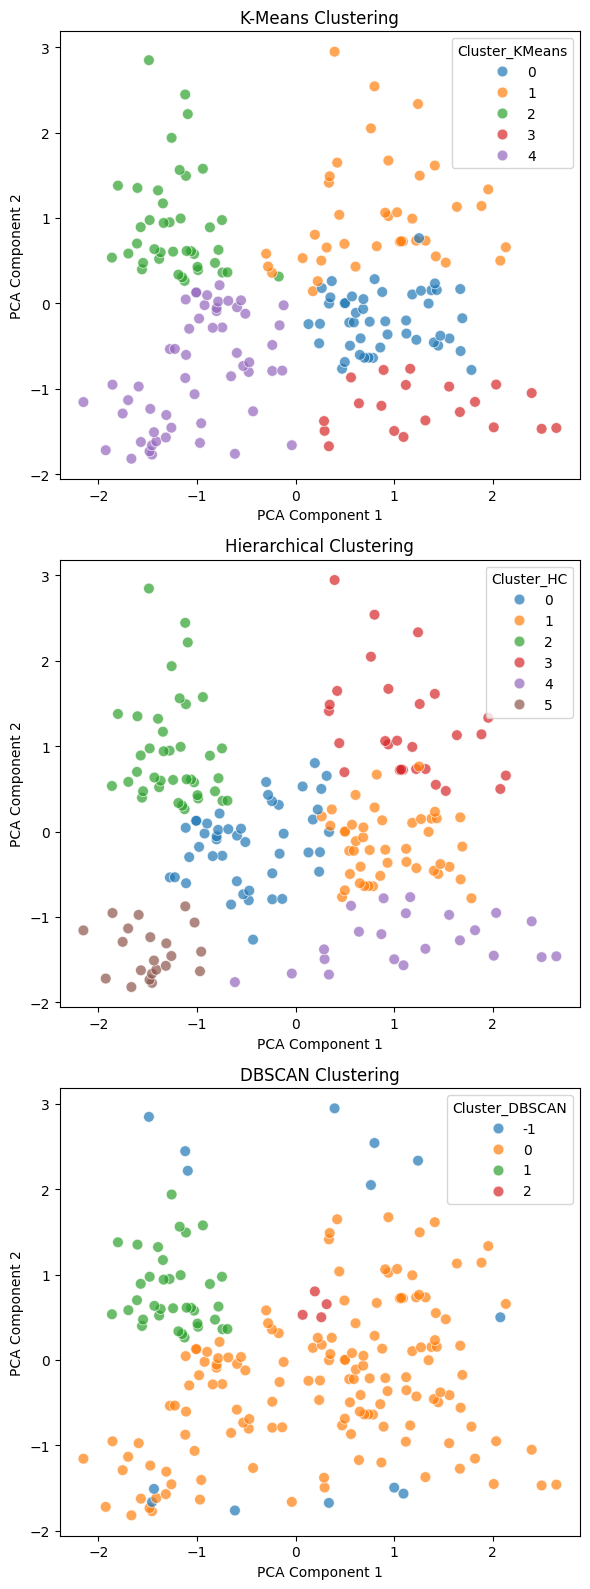

In [25]:
# Plot all clusters for comparison
plt.figure(figsize=(6, 16))

# K-Means Clusters
plt.subplot(3, 1, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_KMeans', data=pca_df, palette='tab10', s=60, alpha=0.7, marker='o')
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Hierarchical Clusters
plt.subplot(3, 1, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_HC', data=pca_df, palette='tab10', s=60, alpha=0.7, marker='o')
plt.title('Hierarchical Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# DBSCAN Clusters
plt.subplot(3, 1, 3)
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_DBSCAN', data=pca_df, palette='tab10', s=60, alpha=0.7, marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')


plt.tight_layout()
plt.show()


In [26]:
del pca_df

* KMeans seems to provide good clustering with 5 clusters

In [27]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score',
       'Age Group', 'Cluster_KMeans', 'Cluster_HC', 'Cluster_DBSCAN'],
      dtype='object')

### Analyzing the Clustering

In [31]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score',
       'Age Group', 'Cluster_KMeans', 'Cluster_HC', 'Cluster_DBSCAN'],
      dtype='object')

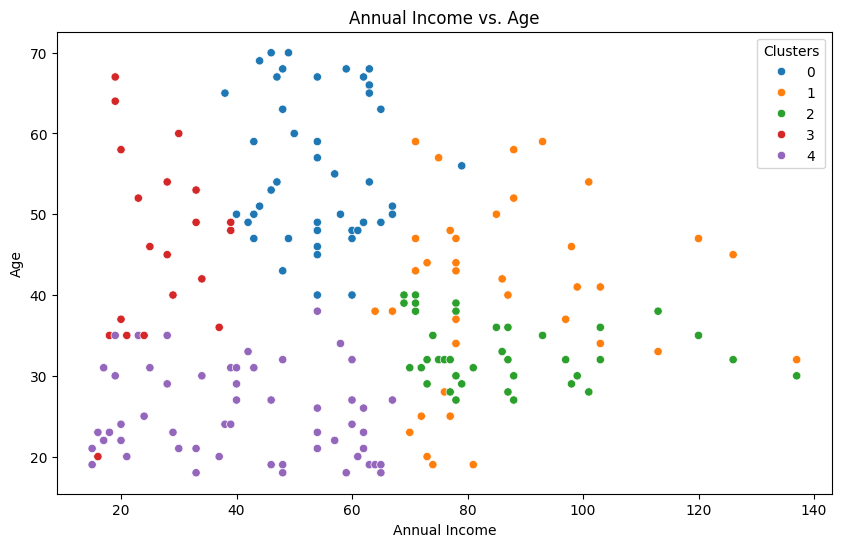

In [32]:
# Explore the relationship between Annual Income and Spending Score



plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Age', hue='Cluster_KMeans', data=df, palette="tab10")
plt.title('Annual Income vs. Age')
plt.xlabel('Annual Income')
plt.ylabel('Age')
plt.legend(title='Clusters')
plt.show()


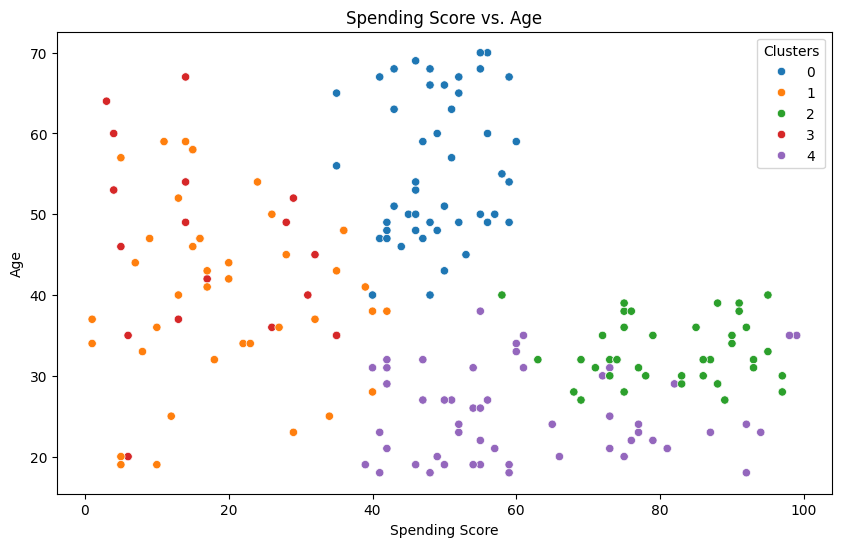

In [33]:
# Explore the relationship between Annual Income and Spending Score



plt.figure(figsize=(10, 6))
sns.scatterplot(x='Spending Score', y='Age', hue='Cluster_KMeans', data=df, palette="tab10")
plt.title('Spending Score vs. Age')
plt.xlabel('Spending Score')
plt.ylabel('Age')
plt.legend(title='Clusters')
plt.show()


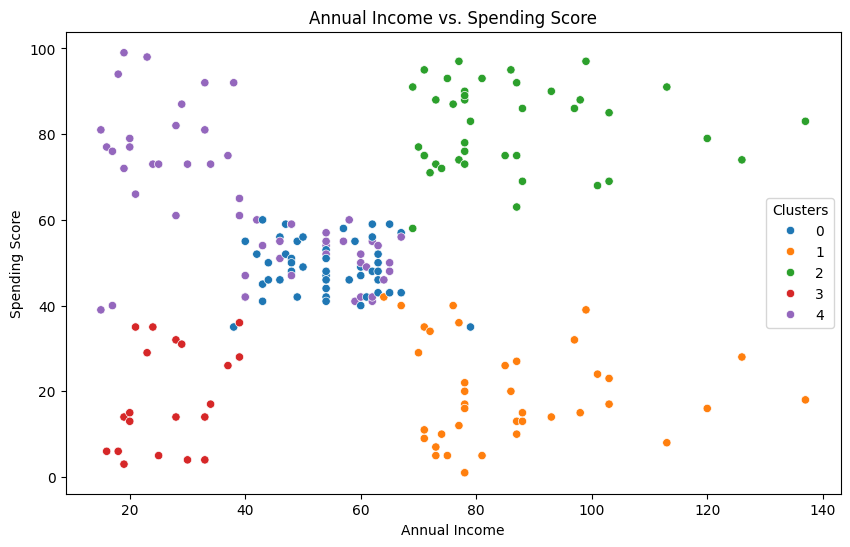

In [35]:
# Explore the relationship between Annual Income and Spending Score



plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Spending Score', hue='Cluster_KMeans', data=df, palette="tab10")
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Clusters')
plt.show()


##### Understanding the clusters across various dimensions

* annual income/spending score is very low for blue and purple (0 & 4 clusters)
* purple and blue have age difference
* green and orange (1, 2) have higher annual income/ spending score
* green is lower age as well
* orange and red have ge all over
* red (3) have higher annual income/ spending score

## Conclusion -- Different personas in in our mall customer datasets

* <span style="color:blue"> **Cluster 0 (Blue) - Thrifty Silver Savers**</span>
    * Annual Income/Spending Score: Very low
    * Age: Older age group
    * Persona: These are older customers who visit the mall for essential shopping and prefer to spend minimally. They are budget-conscious and always on the lookout for value deals.


* <span style="color:orange"> **Cluster 1 (Orange) - Smart Spender Families**</span>
    * Annual Income/Spending Score: High
    * Age: Middle-aged
    * Persona: These shoppers have higher incomes and often balance family needs with personal preferences. They spend significantly on both necessities and luxury items, making smart, value-driven choices.


* <span style="color:green"> **Cluster 2 (Green) - Young Luxury Enthusiasts**</span>
    * Annual Income/Spending Score: High
    * Age: Younger age group
    * Persona: These are younger customers with higher disposable incomes who enjoy spending on lifestyle and luxury items. Shopping is a leisure activity for them, and they love keeping up with the latest trends.


* <span style="color:red"> **Cluster 3 (Red) - Budget-Conscious Seniors**</span>
    * Annual Income/Spending Score: Balanced
    * Age: Mostly mid to older age group
    * Persona: This cluster includes mid-to older age groups who have balanced incomes but are conscious of their spending. They focus on making wise purchases and often seek out bargains.



* <span style="color:purple"> **Cluster 4 (Purple) - Impulsive Young Shoppers**</span>
    * Annual Income/Spending Score: Very low
    * Age: Younger age group
    * Persona: These are younger customers with limited incomes but high spending scores. They exhibit impulsive buying behaviors, often spending beyond their means on trendy and desirable items.


Some Markdown text with <span style="color:blue">some *blue* text</span>.

### Dimensionality Reduction using PCA

* Principal Component Analysis (PCA) is a technique used for dimensionality reduction that transforms data into a new coordinate system. 
* The new coordinates, known as principal components, are ordered by the amount of variance they capture from the original data. 
* This helps in simplifying complex datasets by reducing the number of dimensions while retaining the most important features.

In [36]:
from sklearn.decomposition import PCA


pca = PCA()
pca.fit(scaled_features)


# Explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Create a DataFrame for the explained variance
pca_variance_df = pd.DataFrame({
    'Component': range(1, len(explained_variance_ratio) + 1),
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Variance Ratio': cumulative_variance_ratio
})

print(pca_variance_df)

del explained_variance_ratio, cumulative_variance_ratio

   Component  Explained Variance Ratio  Cumulative Variance Ratio
0          1                  0.442662                   0.442662
1          2                  0.333084                   0.775745
2          3                  0.224255                   1.000000


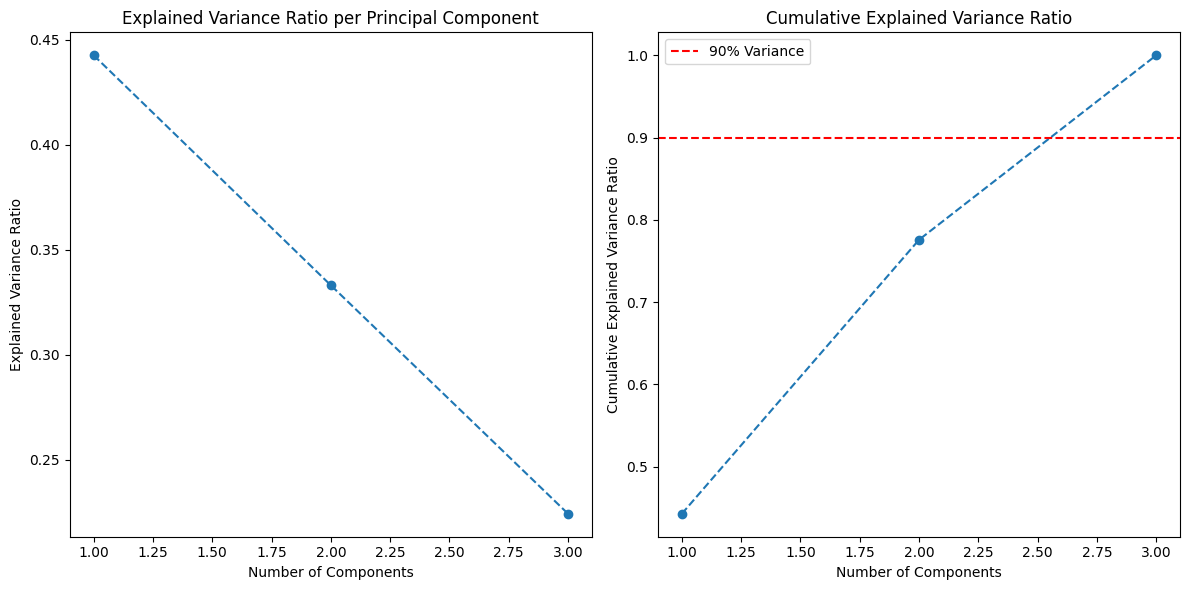

In [37]:
# Plot explained variance ratio
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(pca_variance_df['Component'], pca_variance_df['Explained Variance Ratio'], marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')

# Plot cumulative explained variance ratio
plt.subplot(1, 2, 2)
plt.plot(pca_variance_df['Component'], pca_variance_df['Cumulative Variance Ratio'], marker='o', linestyle='--')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.legend()

plt.tight_layout()
plt.show()


In [38]:
# Get the component loadings (weights) for each feature
component_loadings = pd.DataFrame(pca.components_.T, index=features.columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print(component_loadings)

del component_loadings

                     PC1       PC2       PC3
Age             0.706382  0.030141  0.707188
Annual Income  -0.048024  0.998832  0.005398
Spending Score -0.706199 -0.037775  0.707005


In [39]:
del pca, pca_variance_df

* Each row in the component_loadings DataFrame shows the weight of the original features in each principal component. 
* Higher absolute values indicate a greater contribution to that principal component.

## Analyze the groups - compare them

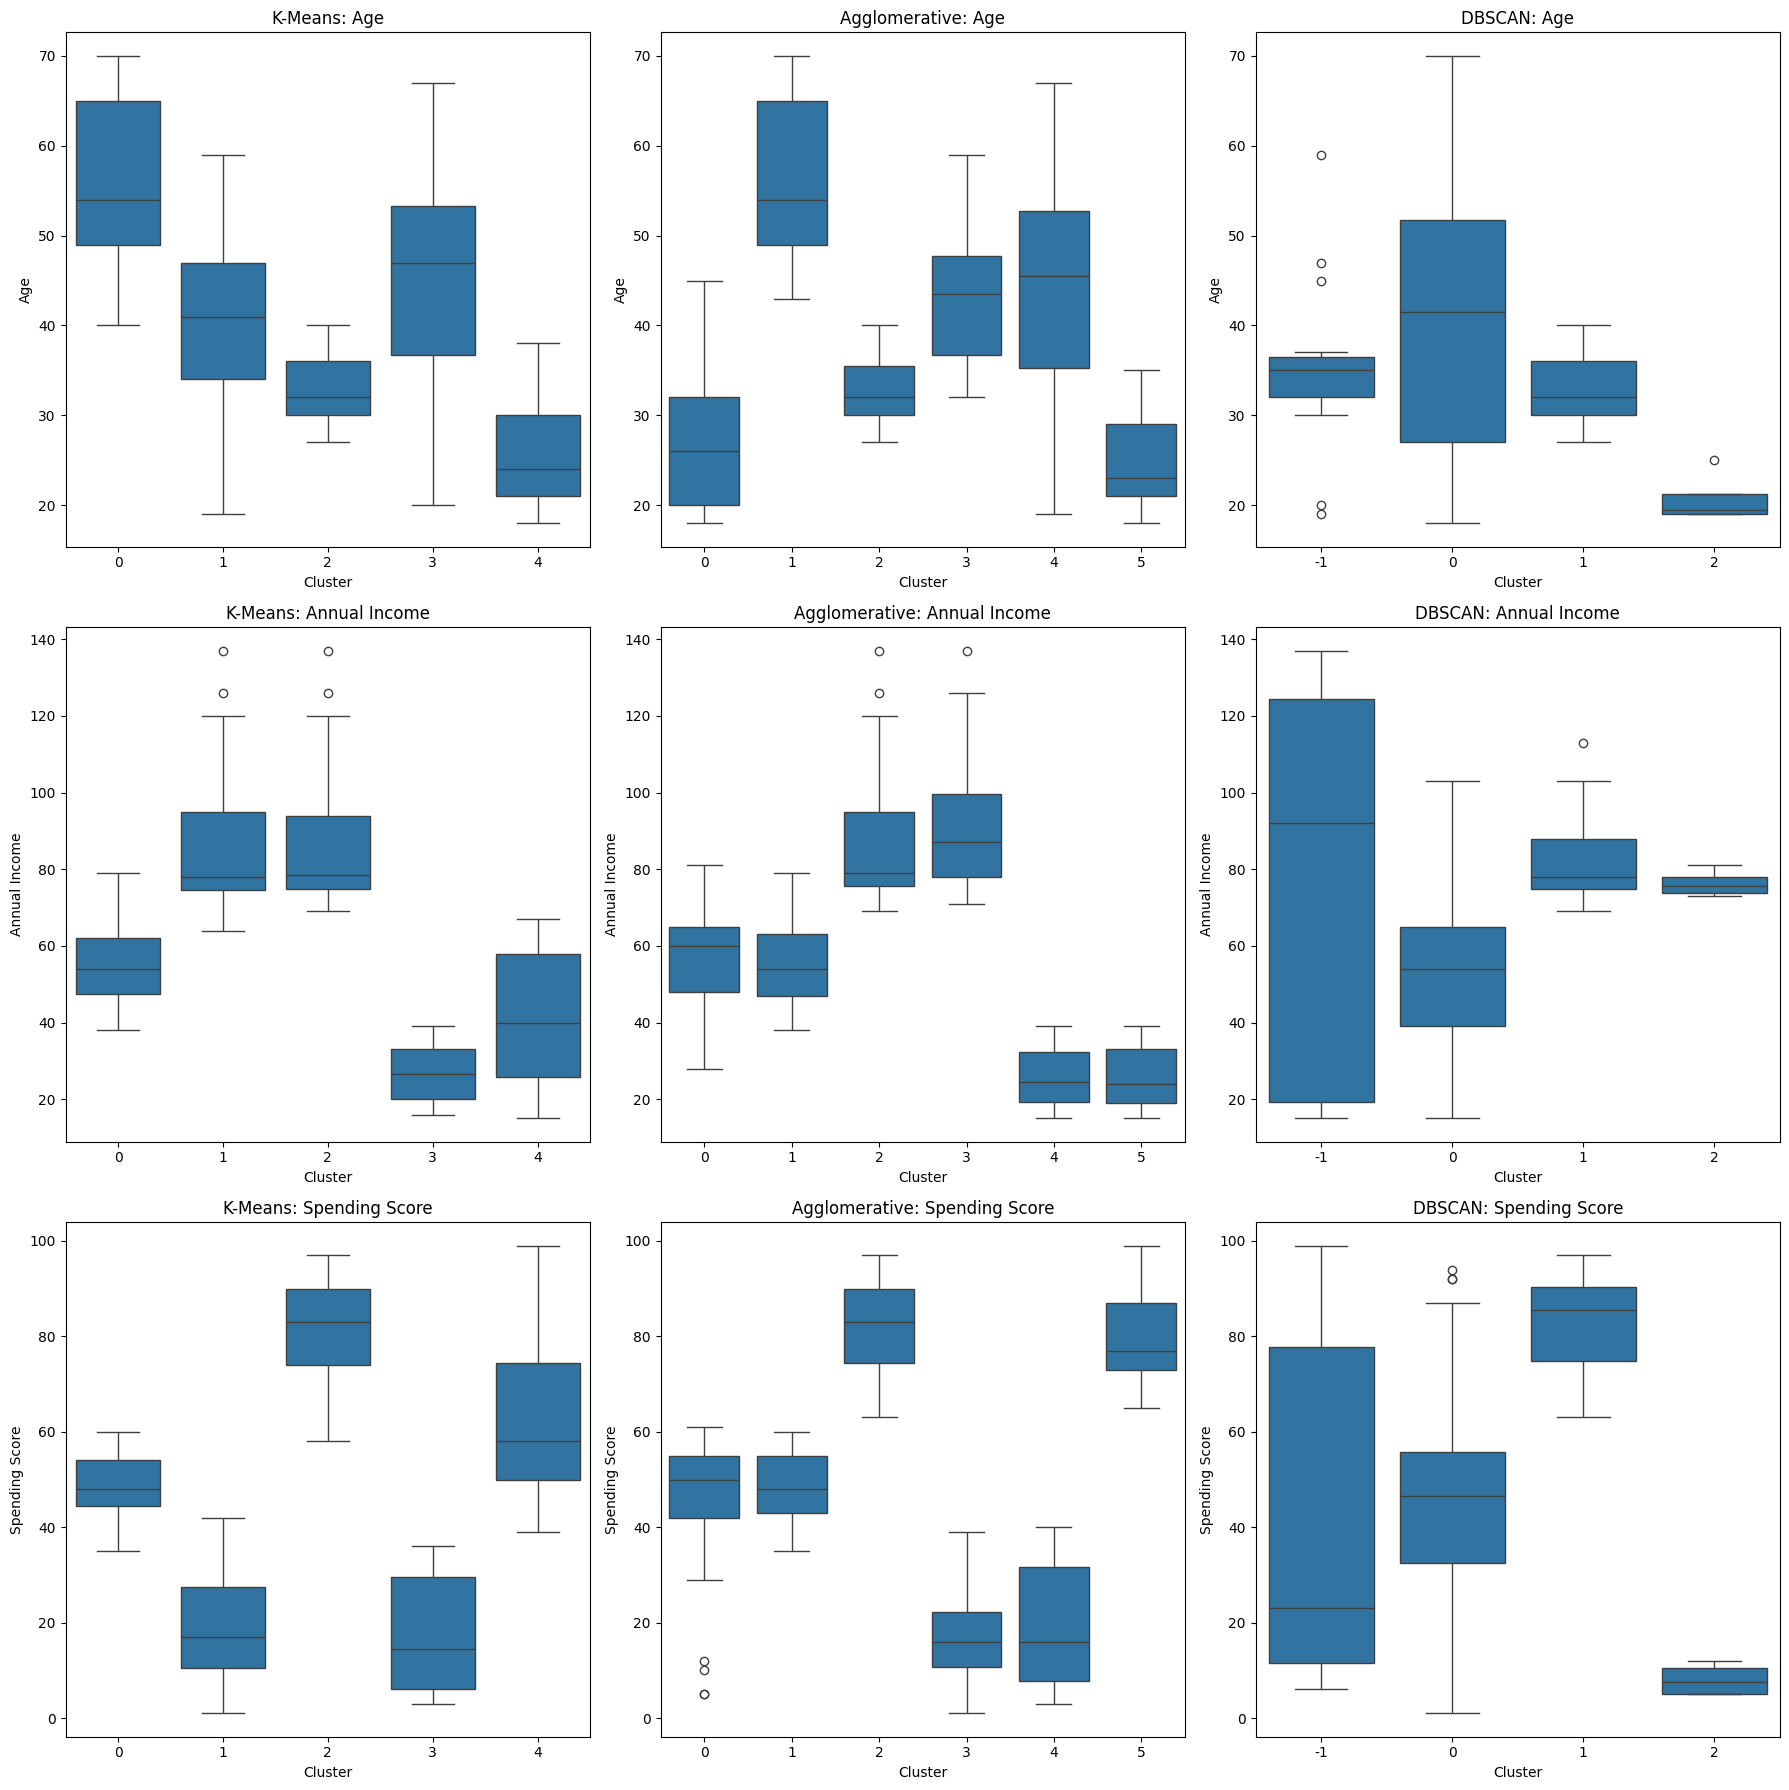

In [41]:

# Define a function to plot feature distributions by cluster
def plot_feature_distributions(ax, df, feature, cluster_col, title):
    sns.boxplot(x=cluster_col, y=feature, data=df, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Cluster')
    ax.set_ylabel(feature)

# Features to plot
features = ['Age', 'Annual Income', 'Spending Score']

# Create subplots
fig, axes = plt.subplots(nrows=len(features), ncols=3, figsize=(18, 18))

# Plot feature distributions for each clustering algorithm
for i, feature in enumerate(features):
    try:
        plot_feature_distributions(axes[i, 0], df, feature, 'Cluster_KMeans', f'K-Means: {feature}')
        plot_feature_distributions(axes[i, 1], df, feature, 'Cluster_HC', f'Agglomerative: {feature}')
        plot_feature_distributions(axes[i, 2], df, feature, 'Cluster_DBSCAN', f'DBSCAN: {feature}')
    except Exception as ex:
        print(ex.args)
        print(i, feature)
    del i, feature
    
plt.tight_layout()
plt.show()

del features, fig, axes

## Extra Credit Assignment (50 points total)

#### Advanced Clustering Techniques (20 points)
- **DBSCAN Clustering**:
  - Implement DBSCAN and compare its segmentation with K-Means and Hierarchical clustering.
  - Analyze the clusters formed by DBSCAN for any unique characteristics.
- **Points**: Quality of implementation and comparative analysis.

#### Dimensionality Reduction Technique (15 points)
- **Principal Component Analysis (PCA)**:
  - Apply PCA to the data and visualize the results.
  - Discuss how dimensionality reduction impacts the clustering results and its potential use in simplifying complex datasets.
- **Points**: Effectiveness of PCA implementation and analysis of its impact.

#### Real-world Application Scenario (15 points)
- **Scenario Development and Justification**:
  - Develop a detailed business scenario utilizing the clustered data.
  - Justify how the chosen segmentation and dimensionality reduction techniques can provide strategic insights in this scenario.
- **Points**: Creativity and practicality in scenario development and justification of techniques.

### Introduction to Cluster Evaluation Techniques

In the realm of unsupervised machine learning, determining the optimal number of clusters is a pivotal decision that can significantly impact the outcomes of your model. Cluster evaluation techniques are essential tools that provide guidance in this decision-making process. Two of the most widely recognized methods for evaluating clustering results are the Elbow Method and the Silhouette Score.

#### Elbow Method
- **Explanation**: The Elbow Method is a heuristic used in determining the number of clusters in a data set. The approach involves plotting the explained variance as a function of the number of clusters, and picking the point where the increase in variance explained by adding another cluster is not significant anymore. This point is known as the 'elbow', where the graph bends.
- **Interpretation**: In the Elbow Method, one should look for a change in the gradient of the line plot; a sharp change like an elbow suggests the optimal number of clusters. The idea is that adding more clusters beyond this number does not provide much better modeling of the data.

#### Silhouette Score
- **Explanation**: The Silhouette Score is a metric used to calculate the goodness of a clustering technique. It measures the distance between points within a cluster and the distance to points in the next nearest cluster. The score ranges from -1 to +1, where a high value indicates that the points are well clustered.
- **Interpretation**: A Silhouette Score close to +1 indicates that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

Both methods provide different lenses through which to view the clustering results and can be used in conjunction to make a more informed decision. The Elbow Method gives us an insight into the variance within each cluster, whereas the Silhouette Score provides a measure of how similar an object is to its own cluster compared to others. The optimal number of clusters is often the one that balances between the two measures, subject to the specific context and use case of the analysis.
